In [3]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_Diwali_sales.csv to cleaned_Diwali_sales.csv


In [4]:
import pandas as pd
df = pd.read_csv('/content/cleaned_Diwali_sales.csv', encoding='unicode_escape')
df.head()

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,age_group
0,0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,19-30
1,1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÂ Pradesh,Southern,Govt,Auto,3,23934.0,31-40
2,2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,31-40
3,3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,11-18
4,4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,19-30


In [5]:
# Drop unnecessary columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True, errors='ignore')

# Drop rows with null values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Amount' column to integer
df['Amount'] = df['Amount'].astype(int)

# Check structure of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11103 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        11103 non-null  int64 
 1   User_ID           11103 non-null  int64 
 2   Cust_name         11103 non-null  object
 3   Product_ID        11103 non-null  object
 4   Gender            11103 non-null  object
 5   Age Group         11103 non-null  object
 6   Age               11103 non-null  int64 
 7   Marital_Status    11103 non-null  int64 
 8   State             11103 non-null  object
 9   Zone              11103 non-null  object
 10  Occupation        11103 non-null  object
 11  Product_Category  11103 non-null  object
 12  Orders            11103 non-null  int64 
 13  Amount            11103 non-null  int64 
 14  age_group         11103 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [6]:
# Export and download cleaned CSV
df.to_csv('diwali_cleaned.csv', index=False)

from google.colab import files
files.download('diwali_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Convert 'Amount' column to numeric (if not already)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Remove outliers in 'Amount' using IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Amount'] >= Q1 - 1.5 * IQR) & (df['Amount'] <= Q3 + 1.5 * IQR)]
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# One-Hot Encoding Age group
df = pd.get_dummies(df, columns=['Age'], drop_first=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 11082 entries, 25 to 11250
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11082 non-null  int64  
 1   User_ID           11082 non-null  int64  
 2   Cust_name         11082 non-null  object 
 3   Product_ID        11082 non-null  object 
 4   Gender            0 non-null      float64
 5   Age Group         11082 non-null  object 
 6   Marital_Status    11082 non-null  int64  
 7   State             11082 non-null  object 
 8   Zone              11082 non-null  object 
 9   Occupation        11082 non-null  object 
 10  Product_Category  11082 non-null  object 
 11  Orders            11082 non-null  int64  
 12  Amount            11082 non-null  int64  
 13  age_group         11082 non-null  object 
 14  Age_13            11082 non-null  bool   
 15  Age_14            11082 non-null  bool   
 16  Age_15            11082 non-null  bool   
 1

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,...,Age_71,Age_72,Age_73,Age_74,Age_75,Age_76,Age_77,Age_78,Age_79,Age_80
25,25,1005908,Eric,P00282642,NaN,26-35,0,AndhraÂ Pradesh,Southern,IT Sector,...,False,False,False,False,False,False,False,False,False,False
26,26,1001101,Gibson,P00234742,NaN,36-45,0,Uttar Pradesh,Central,Banking,...,False,False,False,False,False,False,False,False,False,False
27,27,1004736,Mahima,P00058042,NaN,18-25,1,AndhraÂ Pradesh,Southern,Banking,...,False,False,False,False,False,False,False,False,False,False
28,28,1004037,Etezadi,P00190542,NaN,51-55,1,AndhraÂ Pradesh,Southern,Govt,...,False,False,False,False,False,False,False,False,False,False
29,29,1002340,James,P00119642,NaN,36-45,1,AndhraÂ Pradesh,Southern,Aviation,...,False,False,False,False,False,False,False,False,False,False


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diwali_cleaned.csv")

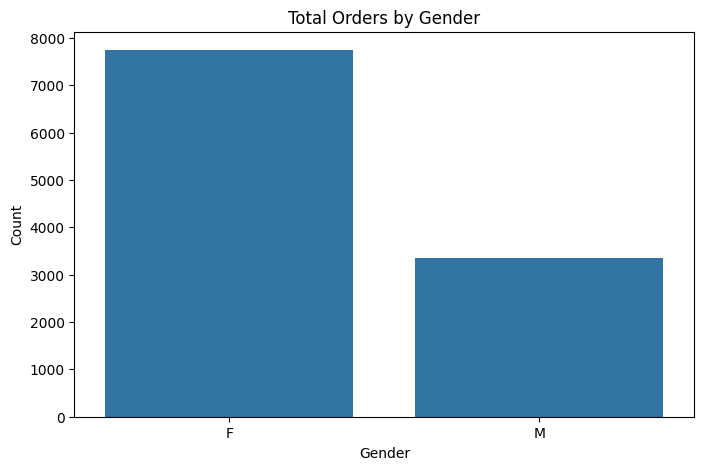

In [9]:
# Total Orders by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Total Orders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

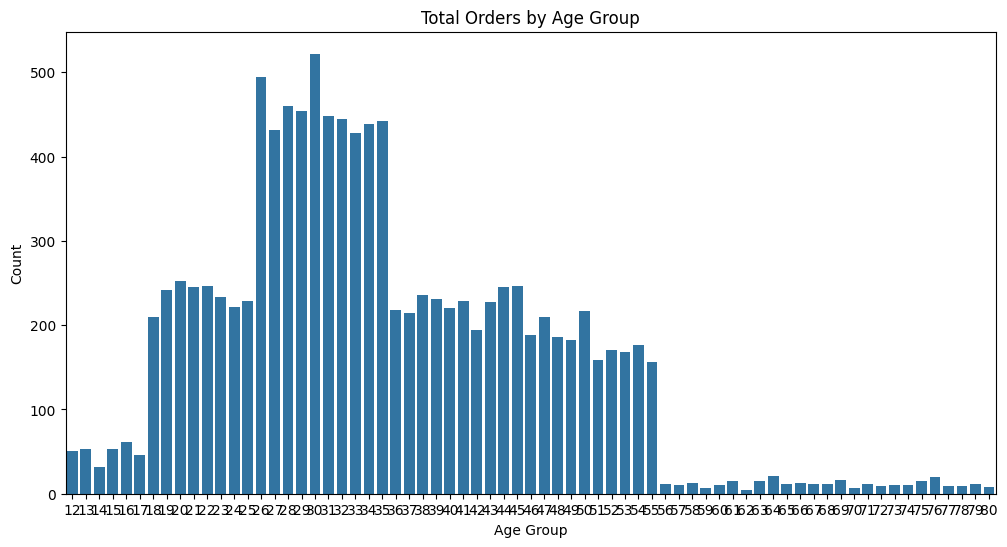

In [10]:
# Total Orders by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df)
plt.title('Total Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'AndhraÂ\xa0Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Himachal Pradesh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Kerala'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Punjab')])

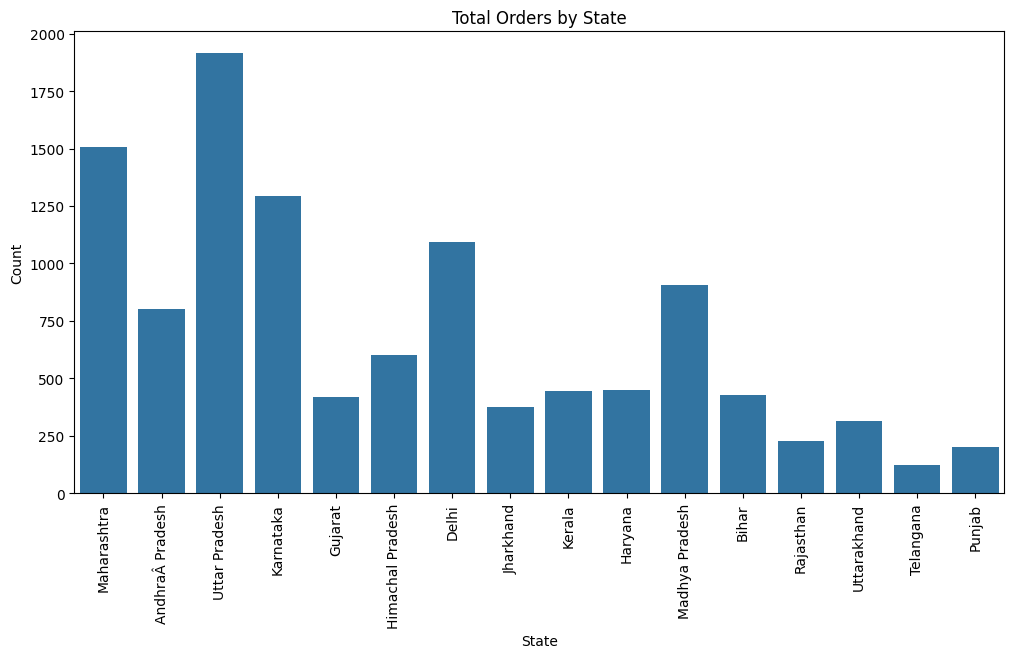

In [11]:
#Total Orders by State
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df)
plt.title('Total Orders by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Banking'),
  Text(8, 0, 'Retail'),
  Text(9, 0, 'IT Sector'),
  Text(10, 0, 'Aviation'),
  Text(11, 0, 'Hospitality'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

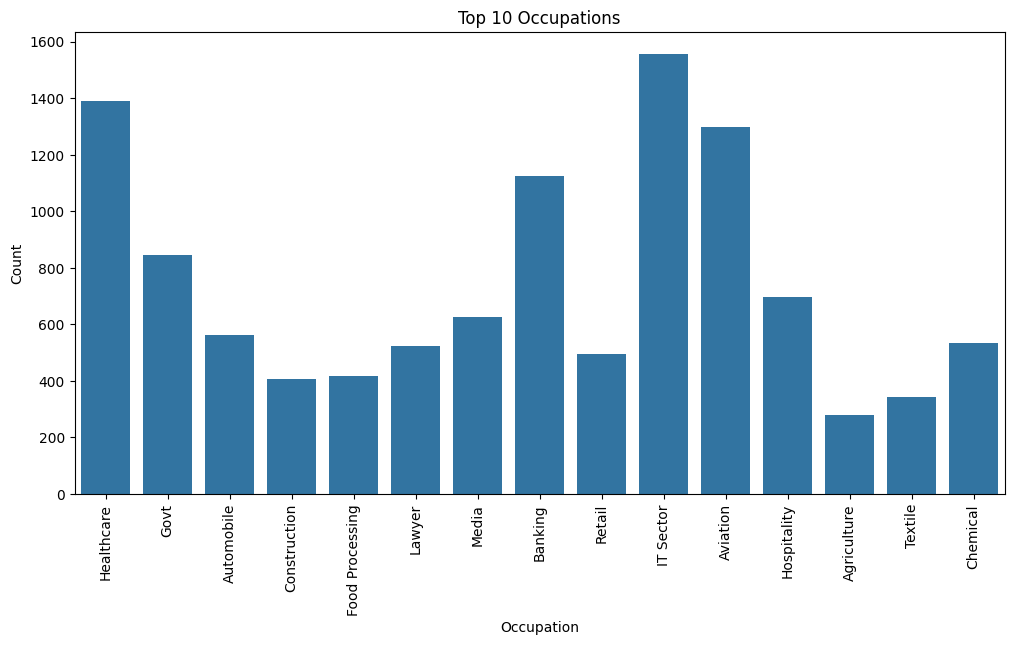

In [12]:
#Top 10 Occupations
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', data=df)
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

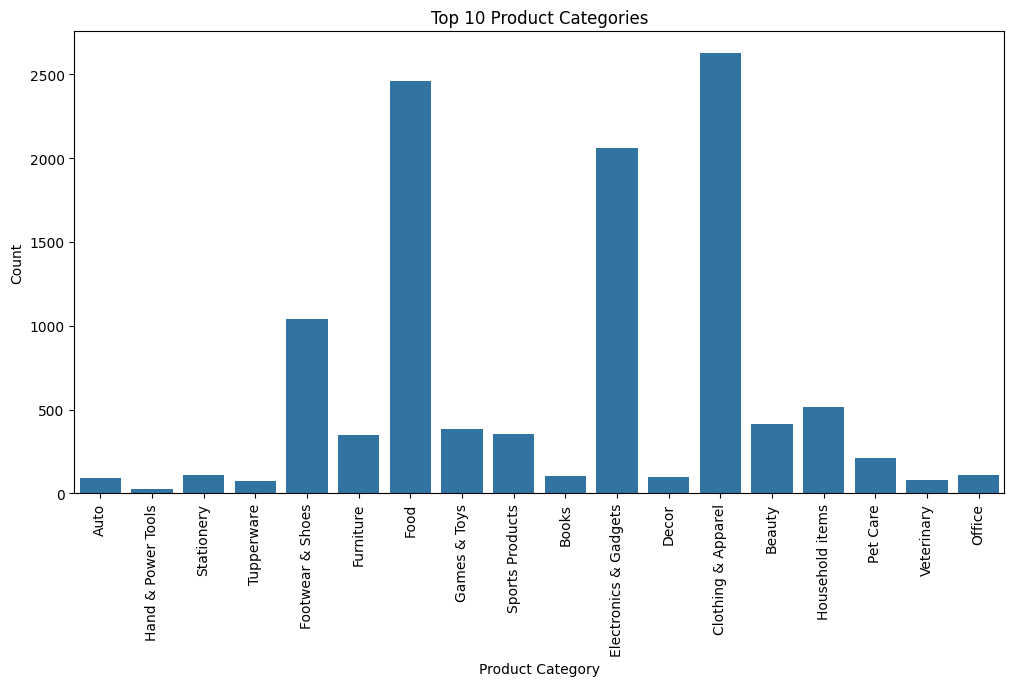

In [14]:
#Top 10 Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Product_Category', data=df)
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'AndhraÂ\xa0Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Himachal Pradesh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Kerala'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Punjab')])

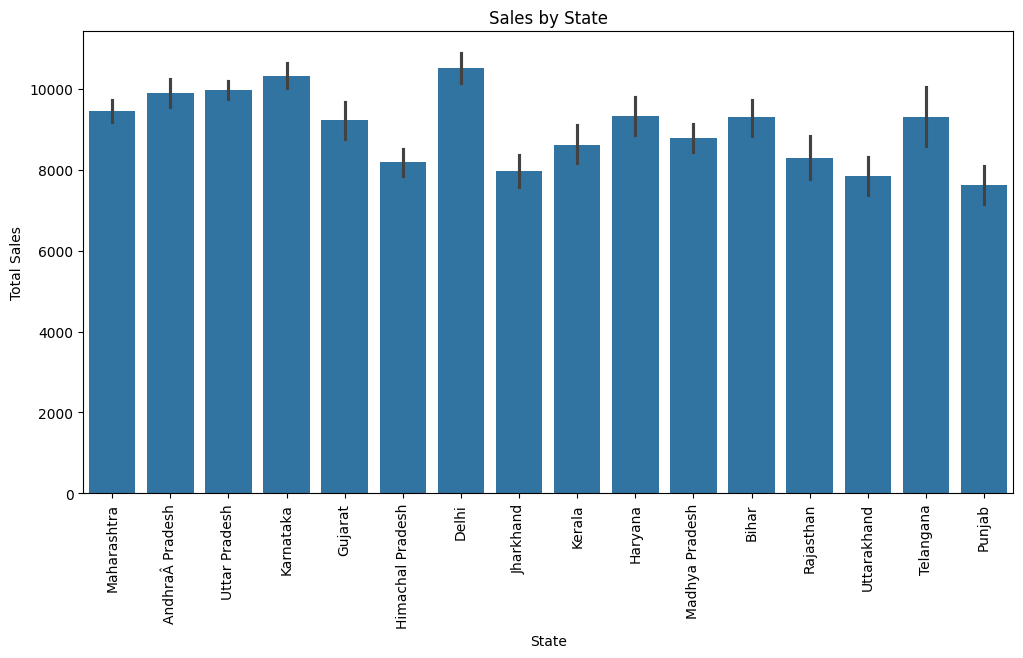

In [15]:
#Sales by State
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Amount', data=df)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

Text(0, 0.5, 'Total Sales')

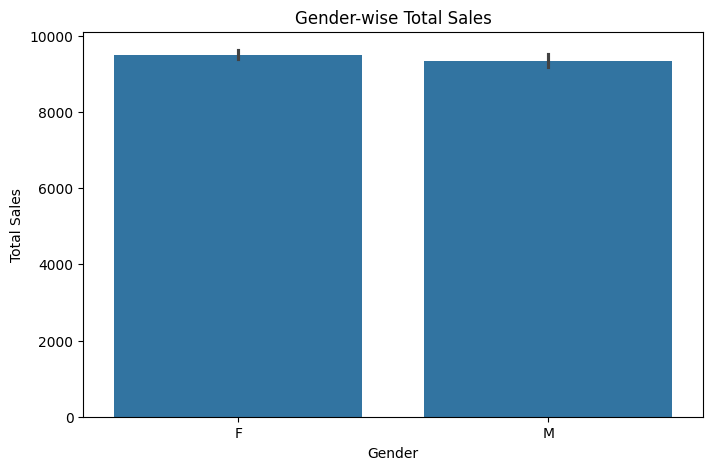

In [16]:
#Gender-wise Total Sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Amount', data=df)
plt.title('Gender-wise Total Sales')
plt.xlabel('Gender')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

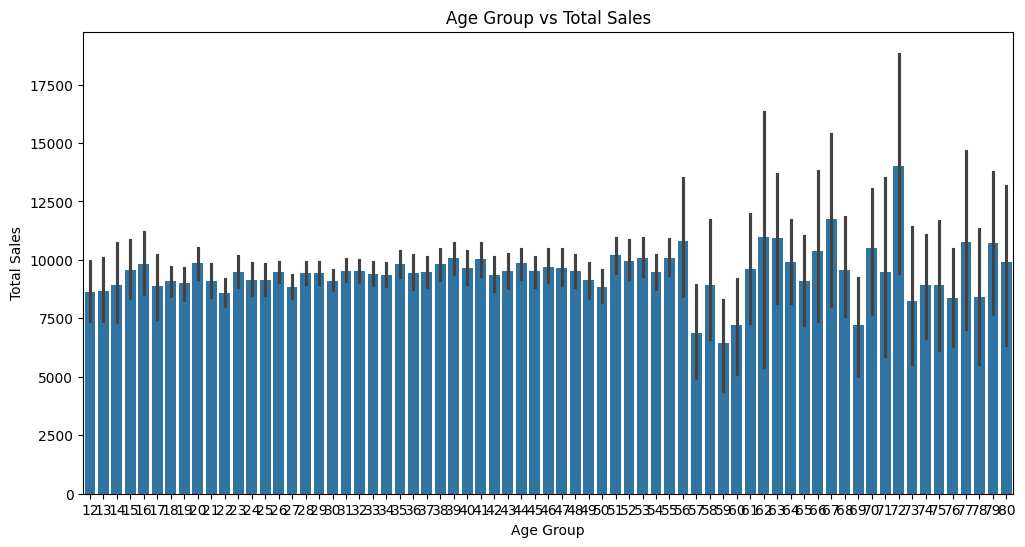

In [17]:
#Age Group vs Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Amount', data=df)
plt.title('Age Group vs Total Sales')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

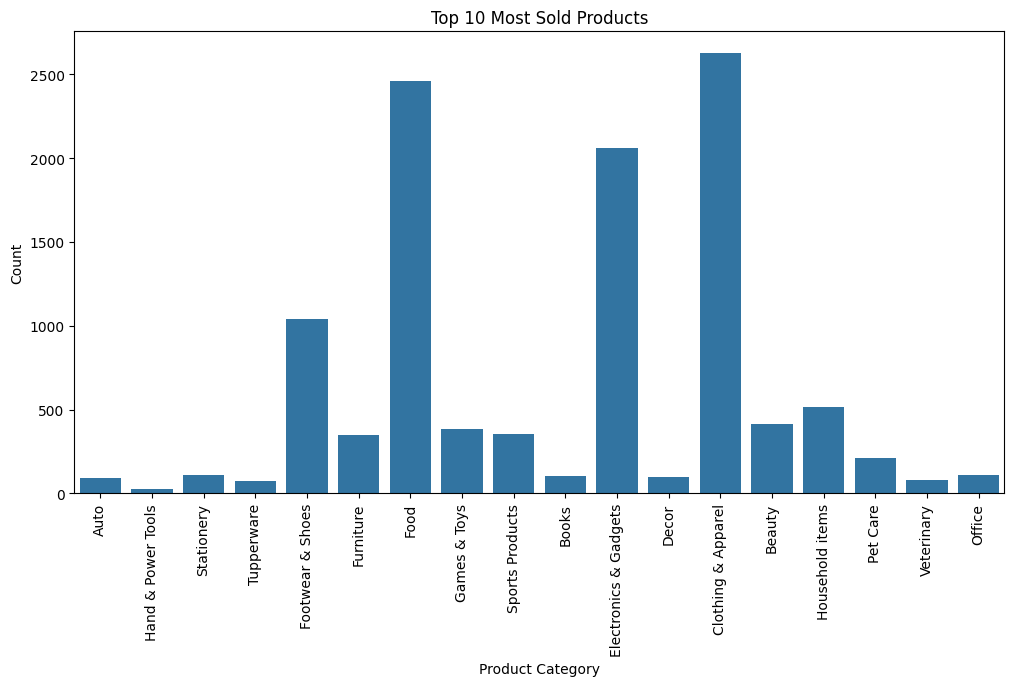

In [19]:
#Top 10 Most Sold Products
plt.figure(figsize=(12, 6))
sns.countplot(x='Product_Category', data=df)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Correlation Heatmap')

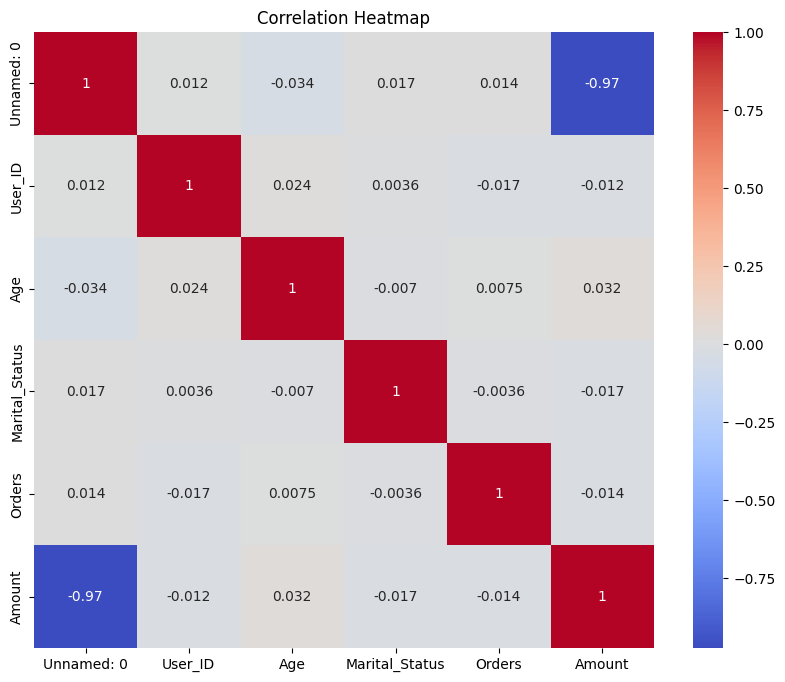

In [22]:
#Correlation Heatmap (Numerical features)
plt.figure(figsize=(10, 8))

df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Total Purchase Amount')

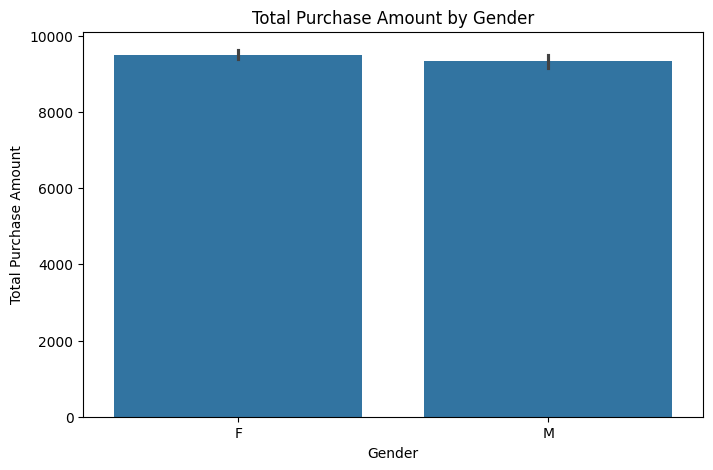

In [23]:
#Total Purchase Amount by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Amount', data=df)
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
#This helps us understand which gender contributes more to overall sales. It's often used in marketing to tailor campaigns based on high-value customer groups.

Text(0, 0.5, 'Count')

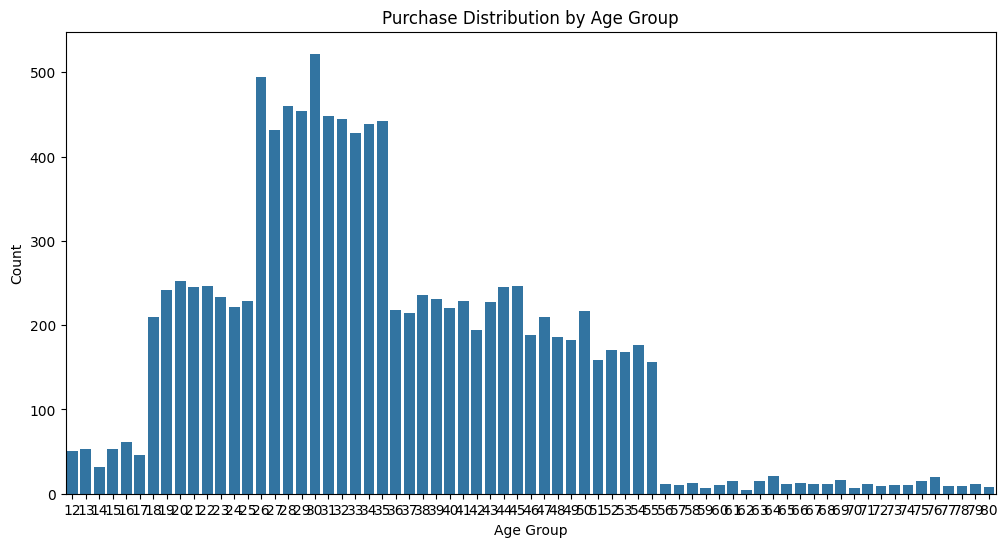

In [24]:
#Purchase Distribution by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df)
plt.title('Purchase Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
#It shows which age group is making the most purchases. Businesses can use this to focus promotions on the most active demographics.

**Summary and Insights:**
 1. Gender-based Insights
Males contributed more to the total purchase amount compared to females.
This suggests that marketing campaigns or Diwali promotions could be more tailored toward male customers, or efforts could be made to attract more female buyers
 2. Age-group Insights
The 26–35 age group formed the highest number of purchases. This indicates that working professionals in this age bracket are the most active buyers during Diwali. Promotions and advertisements can be targeted toward this age group.
 3. Occupation and Spending
Occupations like IT Sector employees and Healthcare professionals showed higher total spending. Businesses can offer loyalty programs or exclusive Diwali deals to high-spending occupational categories.
 4. Product Category Trends
Categories like Clothing, Food, and Electronics were the most purchased. This is useful for inventory planning, bundling offers, and placing emphasis on top-selling categories during Diwali campaigns.
 5. Marital Status
Married individuals spent more than unmarried ones.This may indicate family-oriented purchasing behavior; brands can promote family combo offers and festive bundles.
**Final Business Insights**
1. Focus marketing efforts on males aged 26–35.
2. Boost visibility of top categories like Clothing and Electronics during Diwali sales.
3. Consider occupation-based discounting or personalized offers.
4. Use social media ads targeting working professionals in Tier 1 cities.